In [11]:
def split_matrix(matrix):
    """
    Splits a matrix into four equal-sized submatrices.
    """
    n = len(matrix)
    mid = n // 2
    A11 = [row[:mid] for row in matrix[:mid]]
    A12 = [row[mid:] for row in matrix[:mid]]
    A21 = [row[:mid] for row in matrix[mid:]]
    A22 = [row[mid:] for row in matrix[mid:]]
    return A11, A12, A21, A22

def strassen_matrix_multiply(A, B):
    """
    Performs matrix multiplication using Strassen's algorithm.
    """
    n = len(A)
    
    # Base case: If the matrices are 1x1
    if n == 1:
        return [[A[0][0] * B[0][0]]]

    # Splitting matrices into quarters
    A11, A12, A21, A22 = split_matrix(A)
    B11, B12, B21, B22 = split_matrix(B)

    # Strassen's recursive steps
    S1 = [[B12[i][j] - B22[i][j] for j in range(n // 2)] for i in range(n // 2)]
    S2 = [[A11[i][j] + A12[i][j] for j in range(n // 2)] for i in range(n // 2)]
    S3 = [[A21[i][j] + A22[i][j] for j in range(n // 2)] for i in range(n // 2)]
    S4 = [[B21[i][j] - B11[i][j] for j in range(n // 2)] for i in range(n // 2)]
    S5 = [[A11[i][j] + A22[i][j] for j in range(n // 2)] for i in range(n // 2)]
    S6 = [[B11[i][j] + B22[i][j] for j in range(n // 2)] for i in range(n // 2)]
    S7 = [[A12[i][j] - A22[i][j] for j in range(n // 2)] for i in range(n // 2)]
    S8 = [[B21[i][j] + B22[i][j] for j in range(n // 2)] for i in range(n // 2)]
    S9 = [[A11[i][j] - A21[i][j] for j in range(n // 2)] for i in range(n // 2)]
    S10 = [[B11[i][j] + B12[i][j] for j in range(n // 2)] for i in range(n // 2)]

    # Intermediate matrices
    P1 = strassen_matrix_multiply(A11, S1)
    P2 = strassen_matrix_multiply(S2, B22)
    P3 = strassen_matrix_multiply(S3, B11)
    P4 = strassen_matrix_multiply(A22, S4)
    P5 = strassen_matrix_multiply(S5, S6)
    P6 = strassen_matrix_multiply(S7, S8)
    P7 = strassen_matrix_multiply(S9, S10)

    # Computing result submatrices
    C11 = [[P5[i][j] + P4[i][j] - P2[i][j] + P6[i][j] for j in range(n // 2)] for i in range(n // 2)]
    C12 = [[P1[i][j] + P2[i][j] for j in range(n // 2)] for i in range(n // 2)]
    C21 = [[P3[i][j] + P4[i][j] for j in range(n // 2)] for i in range(n // 2)]
    C22 = [[P5[i][j] + P1[i][j] - P3[i][j] - P7[i][j] for j in range(n // 2)] for i in range(n // 2)]

    # Combining result submatrices
    C = [[0] * n for _ in range(n)]
    for i in range(n // 2):
        for j in range(n // 2):
            C[i][j] = C11[i][j]
            C[i][j + n // 2] = C12[i][j]
            C[i + n // 2][j] = C21[i][j]
            C[i + n // 2][j + n // 2] = C22[i][j]

    return C

# Example usage:
A = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
B = [[17, 18, 19, 20], [21, 22, 23, 24], [25, 26, 27, 28], [29, 30, 31, 32]]

C = strassen_matrix_multiply(A, B)
for row in C:
    print(row)


[250, 260, 270, 280]
[618, 644, 670, 696]
[986, 1028, 1070, 1112]
[1354, 1412, 1470, 1528]


In [12]:
# Test with n = 2
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]
C = strassen_matrix_multiply(A, B)
for row in C:
    print(row)

[19, 22]
[43, 50]


In [13]:
# Test with n = 4
A = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
B = [[17, 18, 19, 20], [21, 22, 23, 24], [25, 26, 27, 28], [29, 30, 31, 32]]

C = strassen_matrix_multiply(A, B)
for row in C:
    print(row)


[250, 260, 270, 280]
[618, 644, 670, 696]
[986, 1028, 1070, 1112]
[1354, 1412, 1470, 1528]


In [14]:
# Test with n = 6
A = [[1, 2, 3, 4, 5, 6],
     [7, 8, 9, 10, 11, 12],
     [13, 14, 15, 16, 17, 18],
     [19, 20, 21, 22, 23, 24],
     [25, 26, 27, 28, 29, 30],
     [31, 32, 33, 34, 35, 36]]

B = [[36, 35, 34, 33, 32, 31],
     [30, 29, 28, 27, 26, 25],
     [24, 23, 22, 21, 20, 19],
     [18, 17, 16, 15, 14, 13],
     [12, 11, 10, 9, 8, 7],
     [6, 5, 4, 3, 2, 1]]

C = strassen_matrix_multiply(A, B)
for row in C:
    print(row)


IndexError: list index out of range

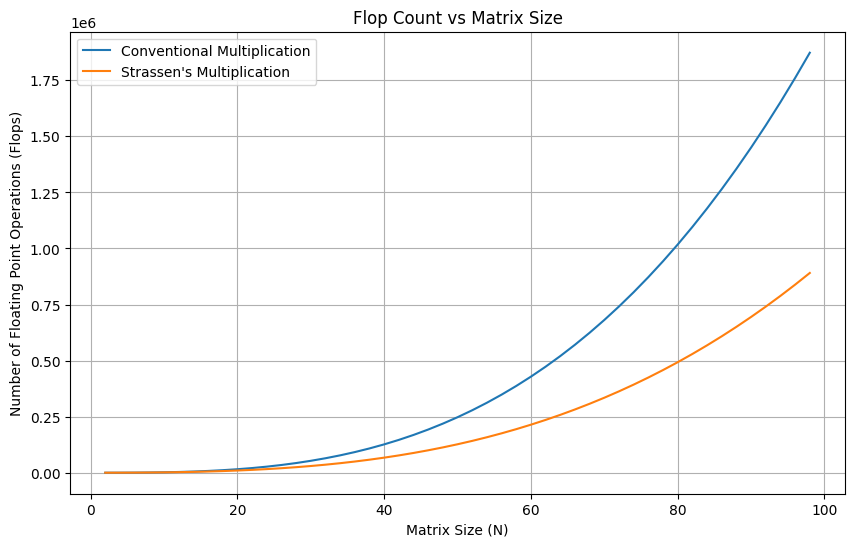

In [10]:
 import matplotlib.pyplot as plt

def flop_count_conventional(n):
    # For conventional matrix multiplication, each element in the resulting matrix
    # requires one multiplication and one addition operation.
    return (2 * (n**3) - n**2)

def flop_count_strassen(n):
    # Matrix Addition/Subtraction
    addition_subtraction = 7 * n**2

    # Matrix Multiplication (Recursive Calls)
    multiplication_recursive = 7 * (n//2)**3

    # Total flop count
    total_flops = addition_subtraction + multiplication_recursive
    return total_flops
#A=[2,4,6]
# Matrix sizes
sizes = list(range(2,100,2))  # Even sizes from 2 to 100

# Calculate flop counts for conventional and Strassen's multiplication
flops_conventional = [flop_count_conventional(n) for n in sizes]
flops_strassen = [flop_count_strassen(n) for n in sizes]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sizes, flops_conventional, label='Conventional Multiplication')
plt.plot(sizes, flops_strassen, label="Strassen's Multiplication")
plt.title('Flop Count vs Matrix Size')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Number of Floating Point Operations (Flops)')
plt.legend()
plt.grid(True)
plt.show()
